In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("hurricane.csv", parse_dates=["Date"])

In [3]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,1851-06-25,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
1,AL011851,UNNAMED,1851-06-25,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
2,AL011851,UNNAMED,1851-06-25,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
3,AL011851,UNNAMED,1851-06-25,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
4,AL011851,UNNAMED,1851-06-25,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0


Can we build a model of `minimium pressure` using the hurricane data from year `2015`? Note how they run out names and started using the Greek alphabet in this year.    

In [4]:
df.tail()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
50296,AL192017,RINA,2017-11-08,1200,,TS,38.3N,48.8W,45,994,...,0,90,0,0,0,0,NaN,NaN,NaN,NaN
50297,AL192017,RINA,2017-11-08,1800,,TS,40.1N,49.0W,45,992,...,0,100,0,0,0,0,0.0,0.0,0.0,0.0
50298,AL192017,RINA,2017-11-09,0,,TS,41.8N,48.8W,45,991,...,0,100,0,0,0,0,0.0,0.0,0.0,0.0
50299,AL192017,RINA,2017-11-09,600,,LO,43.6N,48.0W,40,993,...,0,120,0,0,0,0,0.0,0.0,0.0,0.0
50300,AL192017,RINA,2017-11-09,1200,,LO,45.5N,47.0W,40,995,...,0,140,0,0,0,0,0.0,0.0,0.0,0.0


In [5]:
df_2015 = df[df.Date.dt.year == 2015]
df_2015.head()


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
48766,AL012015,ANA,2015-05-06,600,,LO,26.8N,79.2W,25,1016,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
48767,AL012015,ANA,2015-05-06,1200,,LO,28.2N,78.5W,25,1015,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
48768,AL012015,ANA,2015-05-06,1800,,LO,29.7N,77.8W,25,1014,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
48769,AL012015,ANA,2015-05-07,0,,LO,30.8N,77.5W,30,1012,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
48770,AL012015,ANA,2015-05-07,600,,LO,30.7N,77.8W,35,1010,...,0,100,0,0,0,0,0.0,0.0,0.0,0.0


In [6]:
df_2015.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

# Exponential Smoothing
https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

Why use exponential smoothing?
The more recent the observation is obtained, the higher weight would be assigned. For example, it is reasonable to attach larger weights to observations from last month than to observations from 12 months ago.  
![](https://cdn-images-1.medium.com/max/1600/1*um3BcK7r_qfc-rKe29udaQ.png)

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

From looking at the pressure for several years, there's definitely signs of seasonality in `minimum pressure`.  

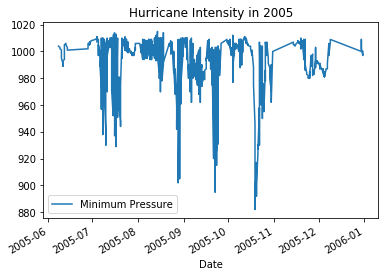

In [8]:
df[df.Date.dt.year == 2005].plot.line(x = 'Date', 
             y = 'Minimum Pressure')
plt.title('Hurricane Intensity in 2005')
plt.show()

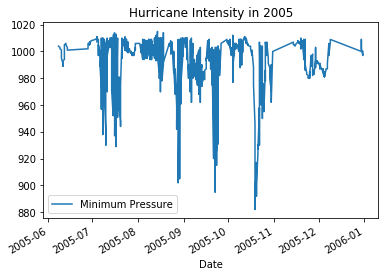

In [9]:
df[df.Date.dt.year == 2005].plot.line(x = 'Date', 
             y = 'Minimum Pressure')
plt.title('Hurricane Intensity in 2005')
plt.show()
# plt.savefig("img/min-pressure-2005.png")

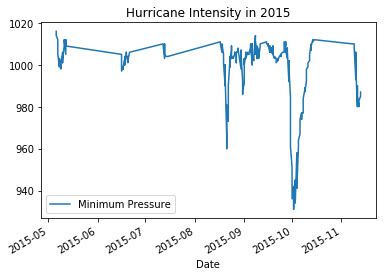

In [10]:
df[df.Date.dt.year == 2015].plot.line(x = 'Date', 
             y = 'Minimum Pressure')
plt.title('Hurricane Intensity in 2015')
# plt.show()
plt.savefig("img/min-pressure-2015.png")

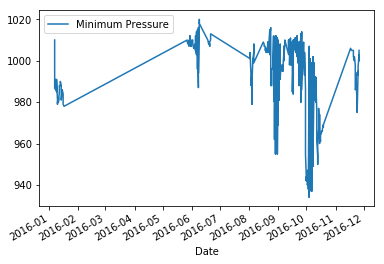

In [11]:
df[df.Date.dt.year == 2016].plot.line(x = 'Date', 
             y = 'Minimum Pressure')
plt.show()

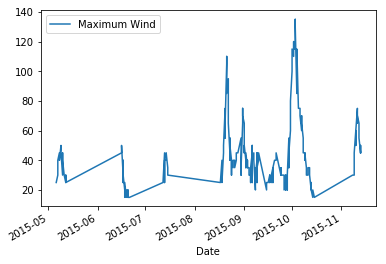

In [12]:
df_2015.plot.line(x = 'Date', 
             y = 'Maximum Wind')
plt.show()

Now that looking at one years isn't that overwhelming, maybe I can try to forecast `minimum pressure` in 2016 by using the historical data from 2005-2015.

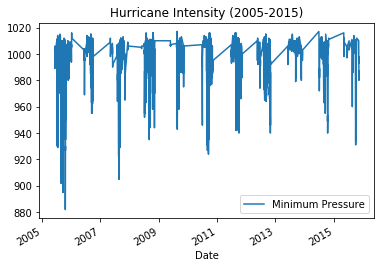

In [13]:
df[df.Date.dt.year.between(2005, 2015)].plot.line(x = 'Date', 
             y = 'Minimum Pressure')
plt.title("Hurricane Intensity (2005-2015)")
plt.show()

Irregardless if we're measuring intensity through `minimum pressure` or `maximum wind`, it looks like we have a very strong seasonal effect from hurricanes. Every year from approximately May to November we have data points for each hurricane observed. But in those months in-between, specifically between December and April, we don't have any observations and that creates a weird dip every year in the hurricane.

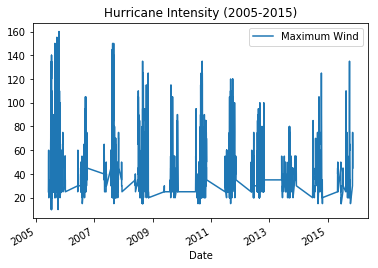

In [14]:
df[df.Date.dt.year.between(2005, 2015)].plot.line(x = 'Date', 
             y = 'Maximum Wind')
plt.title("Hurricane Intensity (2005-2015)")
plt.show()
# plt.savefig('img/maxwind_2005-2015.png')

Let's table aside the exponential smoothing model until we can figure out precisely what to do with the missing values above.   
I think I want to try a seasonal arima (SARIMA) model because clearly the seasonal component is an important aspect of the hurricane model.   

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df = pd.read_csv("hurricane.csv", parse_dates=["Date"])
# df.index.name=None
# df.reset_index(inplace=True)
# df.drop(df.index[114], inplace=True)

In [17]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,1851-06-25,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
1,AL011851,UNNAMED,1851-06-25,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
2,AL011851,UNNAMED,1851-06-25,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
3,AL011851,UNNAMED,1851-06-25,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
4,AL011851,UNNAMED,1851-06-25,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0


In [18]:
# df['Minimum Pressure'].plot(figsize=(18,25), title= 'Minimum Pressure', fontsize=14)

Since we see a fairly regular pattern, it's obvious there's sign of seasonal pattern going on.  

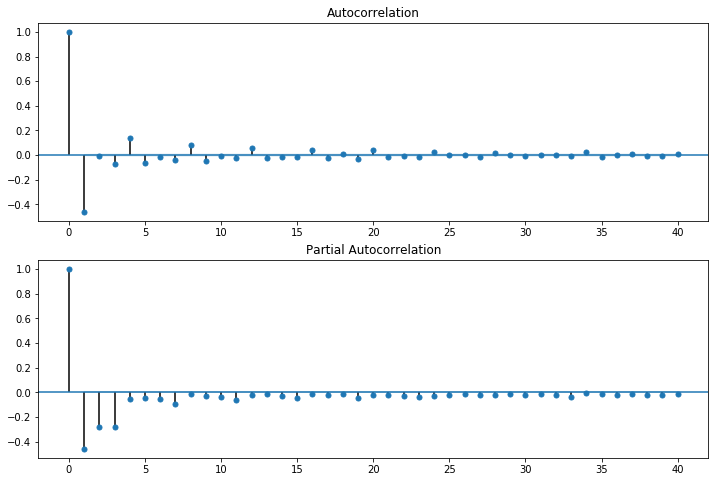

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Minimum Pressure'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Minimum Pressure'].diff().dropna(), lags=40, ax=ax2)
plt.show()

Below, I try the VAR model for Nadine

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
#read the data
df = pd.read_csv("hurricanes_nadine.csv", parse_dates=[['Date', 'Time']])

In [22]:
#check the dtypes
df.dtypes

Date_Time          datetime64[ns]
id                         object
Name                       object
Date_string                 int64
Time_string                 int64
Event                      object
Status                     object
Latitude                  float64
Longitude                 float64
MaxiumWind                  int64
MinimumPressure             int64
sst                       float64
Lat                         int64
Long                        int64
oni_score                 float64
dtype: object

In [23]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H:%M')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [24]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [25]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

In [26]:
np.asarray(train).dtype

dtype('O')

In [27]:
train.columns

Index(['id', 'Name', 'Date_string', 'Time_string', 'Event', 'Status',
       'Latitude', 'Longitude', 'MaxiumWind', 'MinimumPressure', 'sst', 'Lat',
       'Long', 'oni_score'],
      dtype='object')

In [28]:
train_clean = train[['MinimumPressure', 'MaxiumWind']]
valid_clean = train[['MinimumPressure', 'MaxiumWind']]

In [29]:
model = VAR(endog=train_clean)
# model = VAR(endog=train.astype(float))
model_fit = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 6H will be used.
  % freq, ValueWarning)


In [30]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_clean))

# docs example

In [31]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
model = VAR(data)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [32]:
np.asarray(data).dtype

dtype('float64')

In [33]:
data.dtypes1

realgdp     float64
realcons    float64
realinv     float64
dtype: object

Wait, do I have that time gap in Nadine as well between seasons?


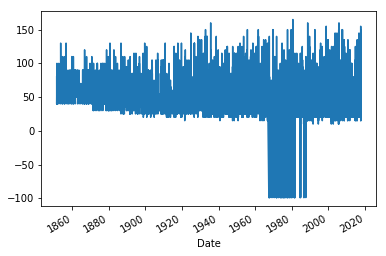

In [45]:
df['Maximum Wind'].plot()

Uh... interesting how there are some -100 values for Nadine...  

# Switching Gears to thinking about predicting hurricane counts  
Perhaps we could change our research question to looking at how many hurricanes occur each year and if we could predict those counts.  

In [34]:
#read the data
# df = pd.read_csv("hurricane.csv", parse_dates=[['Date', 'Time']])
df = pd.read_csv("hurricane.csv", parse_dates=['Date'])

In [35]:
#check the dtypes
df.dtypes

ID                          object
Name                        object
Date                datetime64[ns]
Time                         int64
Event                       object
Status                      object
Latitude                    object
Longitude                   object
Maximum Wind                 int64
Minimum Pressure             int64
Low Wind NE                  int64
Low Wind SE                  int64
Low Wind SW                  int64
Low Wind NW                  int64
Moderate Wind NE             int64
Moderate Wind SE             int64
Moderate Wind SW             int64
Moderate Wind NW             int64
High Wind NE               float64
High Wind SE               float64
High Wind SW               float64
High Wind NW               float64
dtype: object

In [36]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,1851-06-25,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
1,AL011851,UNNAMED,1851-06-25,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
2,AL011851,UNNAMED,1851-06-25,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
3,AL011851,UNNAMED,1851-06-25,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0
4,AL011851,UNNAMED,1851-06-25,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0


In [37]:
df.index = df.Date
data = df.drop(['Time', 'Date'], axis=1)

In [38]:
data.tail()

,ID,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,,,,,,,,,,,,,,,,,,,,
2017-11-08,AL192017,RINA,,TS,38.3N,48.8W,45,994,160,160,0,90,0,0,0,0,NaN,NaN,NaN,NaN
2017-11-08,AL192017,RINA,,TS,40.1N,49.0W,45,992,180,180,0,100,0,0,0,0,0.0,0.0,0.0,0.0
2017-11-09,AL192017,RINA,,TS,41.8N,48.8W,45,991,180,200,0,100,0,0,0,0,0.0,0.0,0.0,0.0
2017-11-09,AL192017,RINA,,LO,43.6N,48.0W,40,993,160,210,0,120,0,0,0,0,0.0,0.0,0.0,0.0
2017-11-09,AL192017,RINA,,LO,45.5N,47.0W,40,995,160,240,0,140,0,0,0,0,0.0,0.0,0.0,0.0


In [39]:
# create new year column
data['year'] = pd.DatetimeIndex(data.index).year
data.head()

,ID,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,year
Date,,,,,,,,,,,,,,,,,,,,,
1851-06-25,AL011851,UNNAMED,,HU,28.0N,94.8W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1851
1851-06-25,AL011851,UNNAMED,,HU,28.0N,95.4W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1851
1851-06-25,AL011851,UNNAMED,,HU,28.0N,96.0W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1851
1851-06-25,AL011851,UNNAMED,,HU,28.1N,96.5W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1851
1851-06-25,AL011851,UNNAMED,L,HU,28.2N,96.8W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1851


In [40]:
# create new month column 
data['month'] = pd.DatetimeIndex(data.index).month
# data.head()

In [41]:
data.groupby(["year", "ID"]).count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x1c25858908>>

## Looking at the new temperature data

Looks like there's a lot of `gz` files within the `temperature_data`. How do you process that within pandas?  

In [43]:
!ls

Documentation.docx           eda_three_years_hurricane.R
Major_Hurricane_Munging.R    elninodata.csv
Presentation1                hurricane.csv
README.md                    hurricane_gary.Rproj
Report.Rmd                   hurricane_simple_model.ipynb
Report.html                  hurricanes_nadine.csv
Stitched_Hurricanes.ipynb    img
data.R                       sst_data.csv
eda.R                        temperature_data
